# Credit Card Customer Segmentation

In this project I will be working for a credit card company as data scientist with the task of analyzing customer data to segement the population. The dataset contains information about the company's clients which we will use to segment the client population into different types in order to give the marketing team a more targeted approach. It has been decided that we should the K-Means model to segment the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
customer_data = pd.read_csv('customer_segmentation.csv')

print(customer_data.head())
print(customer_data.info())
print(customer_data.describe())

   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

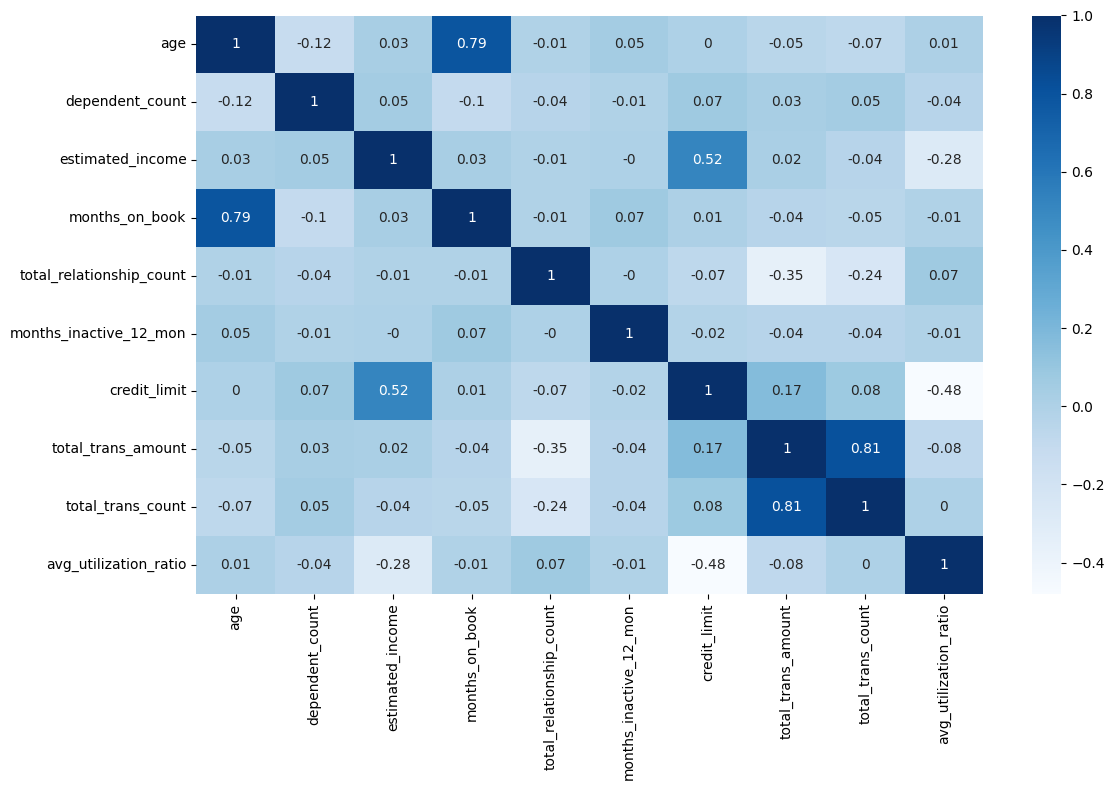

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(customer_data.drop('customer_id', axis=1).corr(numeric_only=True), 2), cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
customers_modif = customer_data.copy()

customers_modif['gender'] = customers_modif['gender'].map({'F': 0, 'M': 1})
customers_modif['education_level'] = customers_modif['education_level'].map({'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5})

customers_modif = pd.get_dummies(customers_modif, columns=['marital_status'])
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,False,True,False,False


In [ ]:
new_customers_modif = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_customers_modif)
print(scaled_data)

[[-0.16540558  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 [ 0.33357038 -0.9434357   2.04319867 ... -0.92821381  1.2523374
  -0.28260887]
 [ 0.58305837  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 ...
 [-0.29014957 -0.9434357  -1.03646242 ...  1.07733799 -0.79850685
  -0.28260887]
 [-2.03656544  1.05995565 -0.26654715 ... -0.92821381 -0.79850685
   3.53845931]
 [-0.41489356 -0.9434357  -0.26654715 ...  1.07733799 -0.79850685
  -0.28260887]]


In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=new_customers_modif.columns)
scaled_data.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


We are now ready to implement our K-Means machine learning model on the scaled data. We have to decide the best number of clusters (k) to use according to the inertia metric. We know that k∝1/inertia, therefore we have to find a balance between are good amount of clusters and low inertia. We are going to plot an elbow curve to find the optimized number of clusters to use the machine learning model.

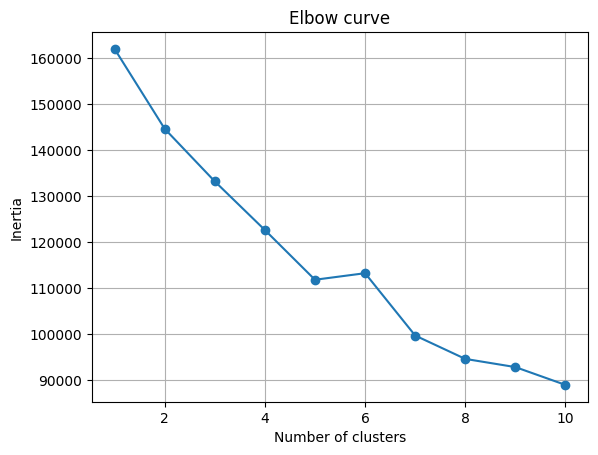

In [ ]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.grid(True)
plt.show()

Looks like 5 or 6 clusters would works the best since after 6 there is sharp decline in inertia, and that is where the 'elbow' bends. Let's plot all these k values in a silhouette plot to get a better understanding. The first plot demonstrates the silhouette score against the number of clusters.

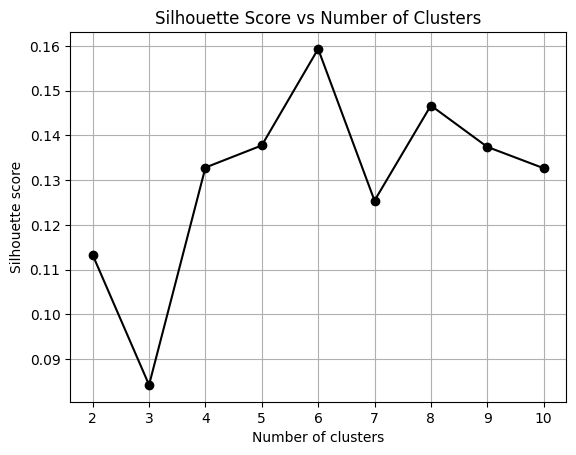

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores,marker='o',color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

The best silhouette score goes to k=6, so 6 clusters would work the best. Although 5 and 8 seem like reasonable options too.

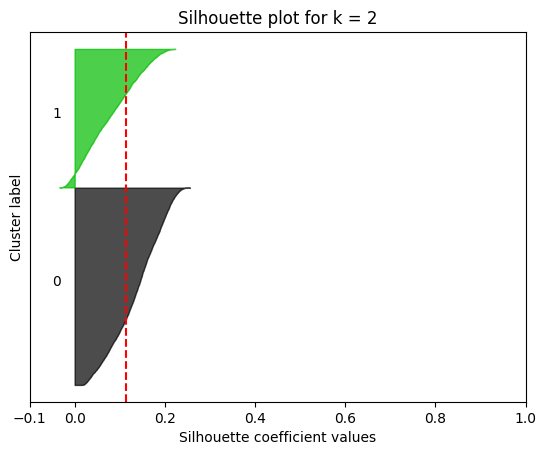

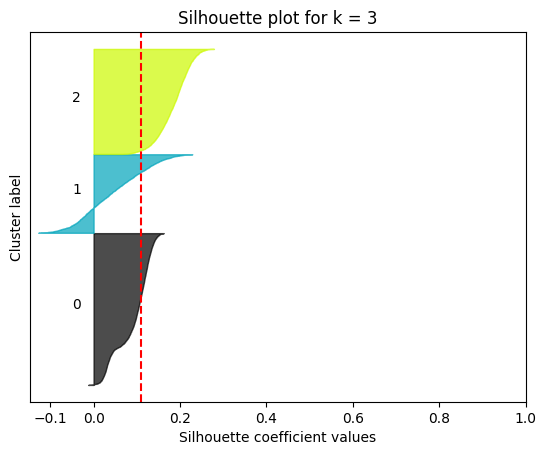

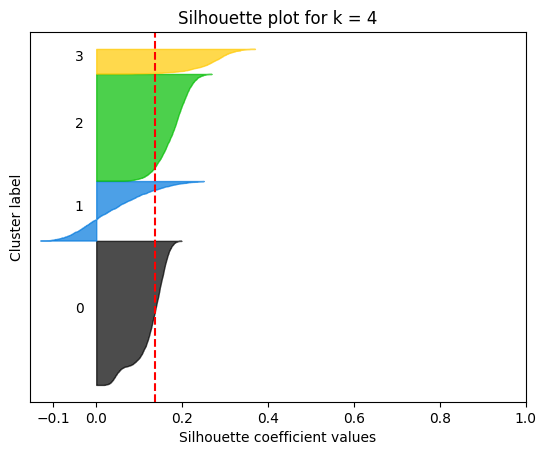

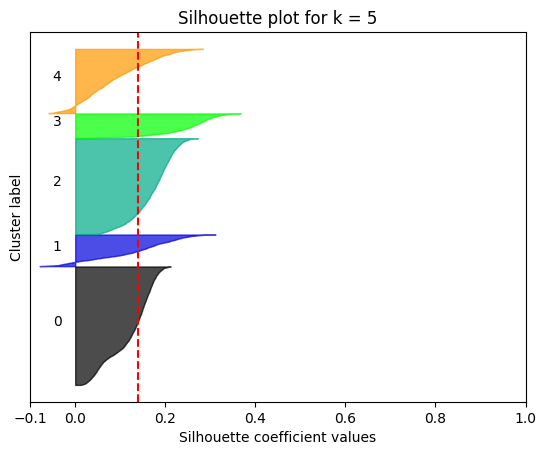

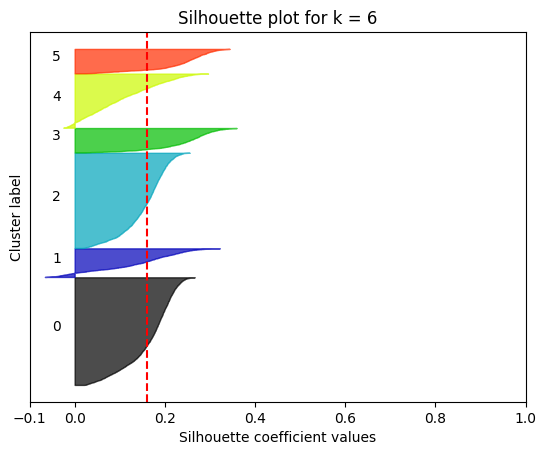

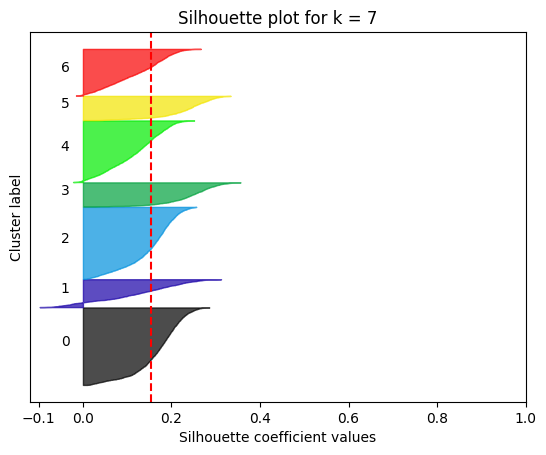

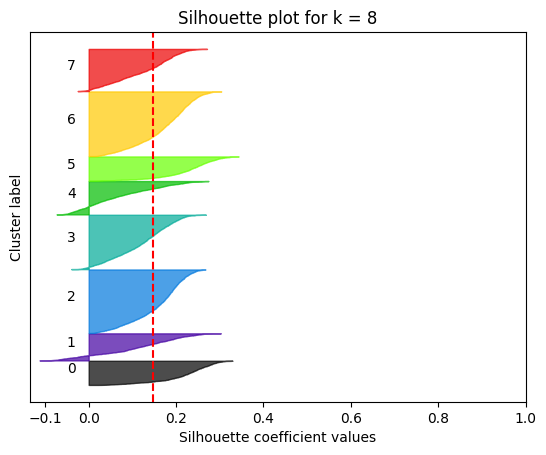

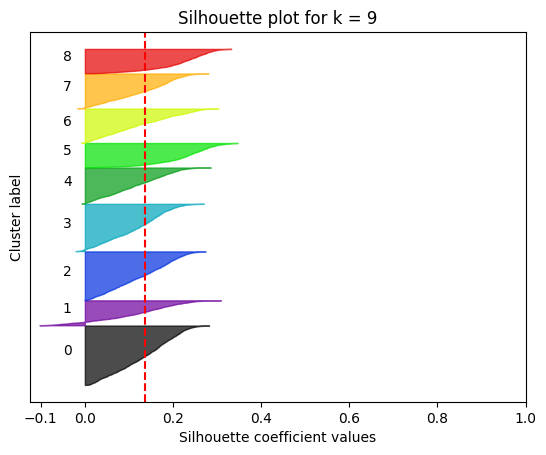

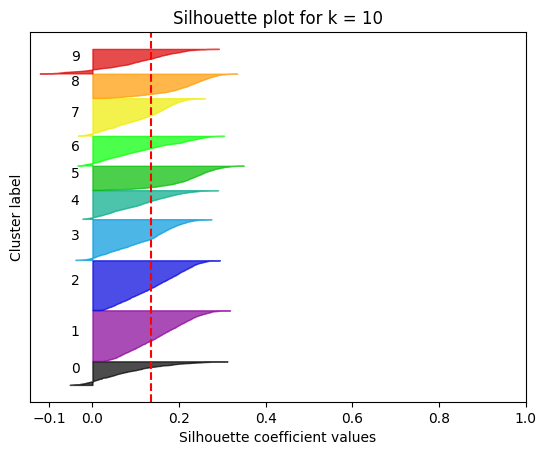

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Function to create silhouette plot
def create_silhouette_plot(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    fig, ax = plt.subplots()
    y_lower = 10  # Starting y position for the plot

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Silhouette plot for k = {}".format(k))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

for k in range(2,11):
  create_silhouette_plot(scaled_data, k)

Looking the  the silhouette line plot we can clearly see that a cluster number of k=6 has yields the highest silhouette score out of all the other cluster numbers. Also in the silhouette plots below that we can see that k=6 has highest coefficient values and the cluster plots are widest. So we will train the machine learning model of k=6.

In [ ]:
kmeans = KMeans(n_clusters=6)
cluster_labels = kmeans.fit_predict(scaled_data)

print(cluster_labels)
print(kmeans.cluster_centers_)
print(kmeans.max_iter)

[3 4 3 ... 3 5 3]
[[-1.10161813e-01  3.37854151e-01 -3.30343819e-02 -5.79291010e-02
   1.76842529e-01 -8.14407003e-02 -1.03747536e+00 -1.42952515e-01
   6.57415886e-01  2.68600236e+00  1.81949605e+00 -3.81928231e-01
  -3.03116243e-02  1.83328523e-03  3.53528994e-02 -3.90682647e-02]
 [ 1.09855286e-01  9.96376519e-01  1.46833529e-01 -3.87551670e-02
   1.45464953e+00  9.54984813e-02  1.12662011e-01  5.39874296e-02
   1.49288557e+00 -3.08209614e-01 -3.30294450e-01 -7.50354015e-01
  -1.38779304e-01  8.49535468e-02  7.68211034e-02 -1.66293975e-01]
 [ 1.39730676e+00 -1.42688095e-01 -9.45195867e-01  3.64675005e-02
  -2.66268167e-01  1.30653945e+00  1.91955250e-01  1.08295769e-01
  -4.20842205e-01 -4.72884514e-01 -5.58010599e-01  2.87908963e-01
  -2.44635774e-01  4.86035480e-01 -2.26576882e-01 -2.59380496e-01]
 [-3.73718776e-01 -2.82167692e-01  2.63691726e-01  1.42230986e-02
  -3.56208040e-01 -3.61745784e-01  9.23988702e-02 -2.29735653e-02
  -4.44325048e-01 -2.55988469e-01 -1.59534430e-01  2.48

Took about 300 iterations for the centeroids of the 6 clusters to remain in a low inertial state. Now let's use those 6 clusters to gather information about the data by feature.

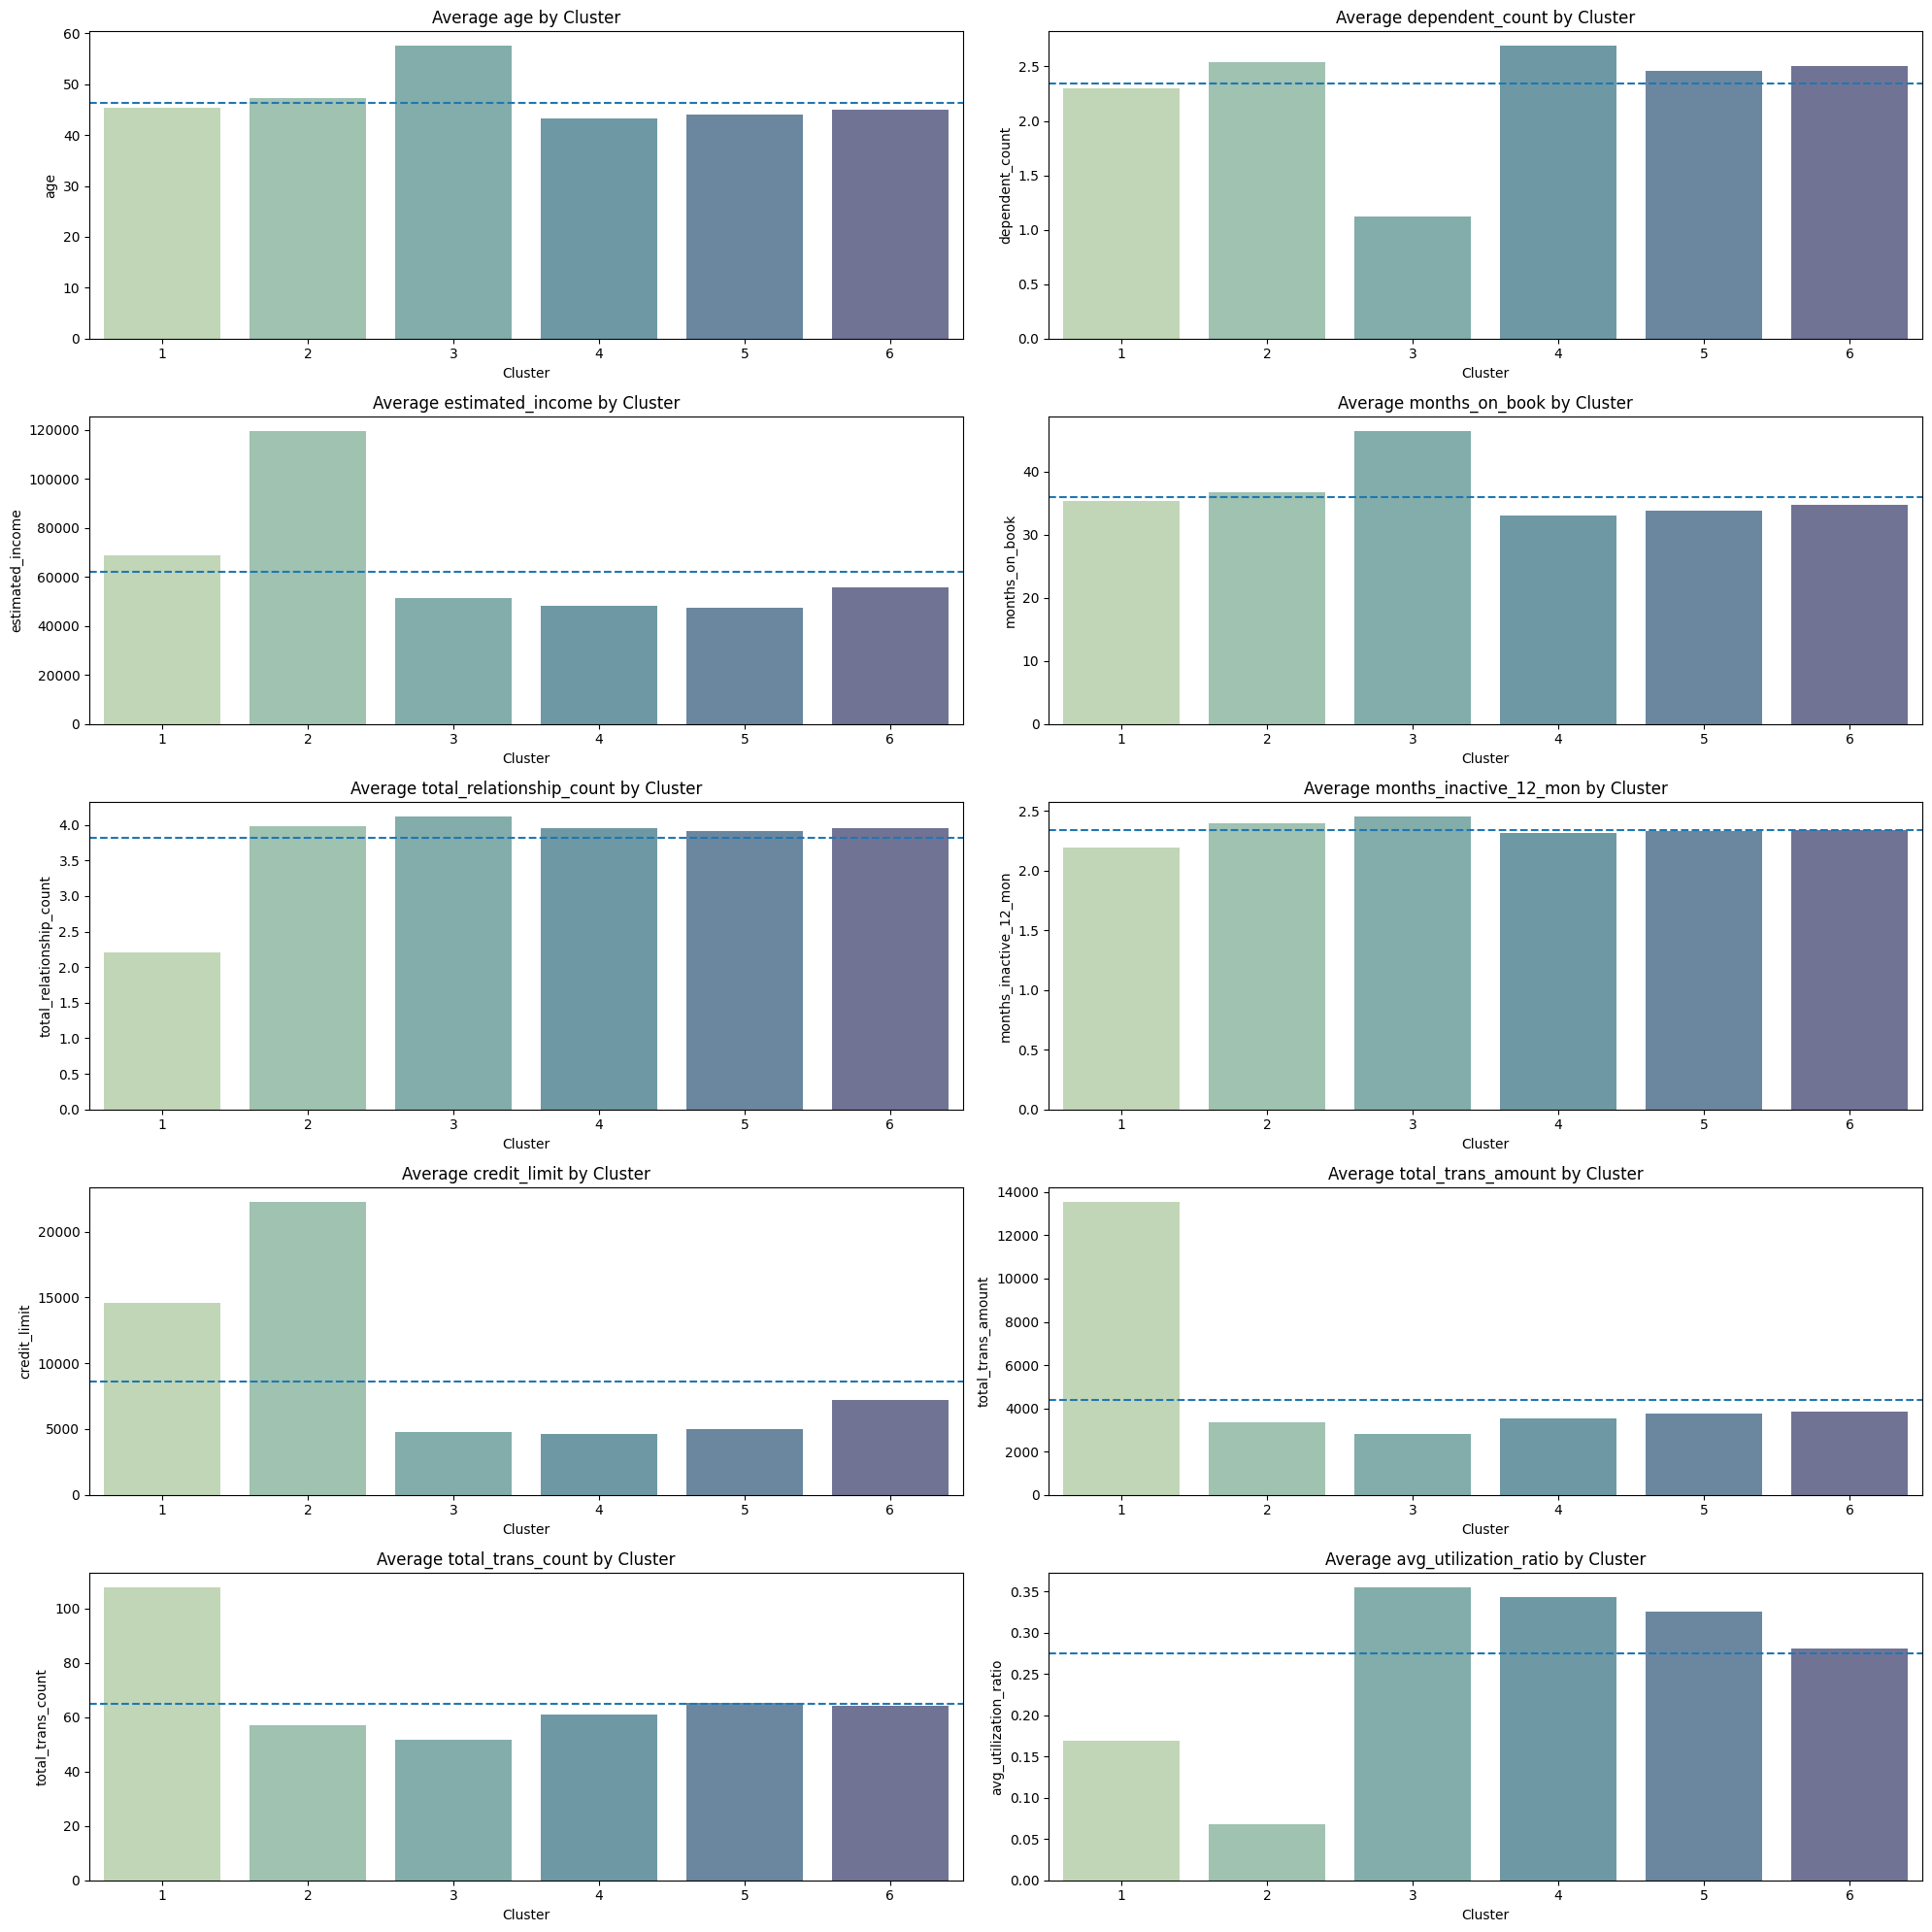

In [ ]:
customer_data['CLUSTER'] = cluster_labels + 1

numeric_cols = customer_data.select_dtypes(include=np.number).drop(['customer_id','CLUSTER'],axis=1).columns

fig = plt.figure(figsize=(20,20))
for i, col in enumerate(numeric_cols):
    grouped_data = customer_data.groupby('CLUSTER')[col].mean().reset_index()
    sns.barplot(x='CLUSTER', y=col, data=grouped_data, ax=fig.add_subplot(5, 2, i+1), hue='CLUSTER',\
                legend=False ,palette='crest',alpha = 0.7)
    plt.axhline(y=customer_data[col].mean(), linestyle='--') # dashed line indicates average
    plt.title(f'Average {col} by Cluster')
    plt.xlabel('Cluster')
    plt.grid(False)

plt.tight_layout()
plt.show()


We can make out a few of conclusions using the bar plots above. We used the highest correlating features from the heat map we made earlier to find some patterns. Like group 1 has the highest transaction amount and trasnaction count out of all other clusters while having about average income levels.

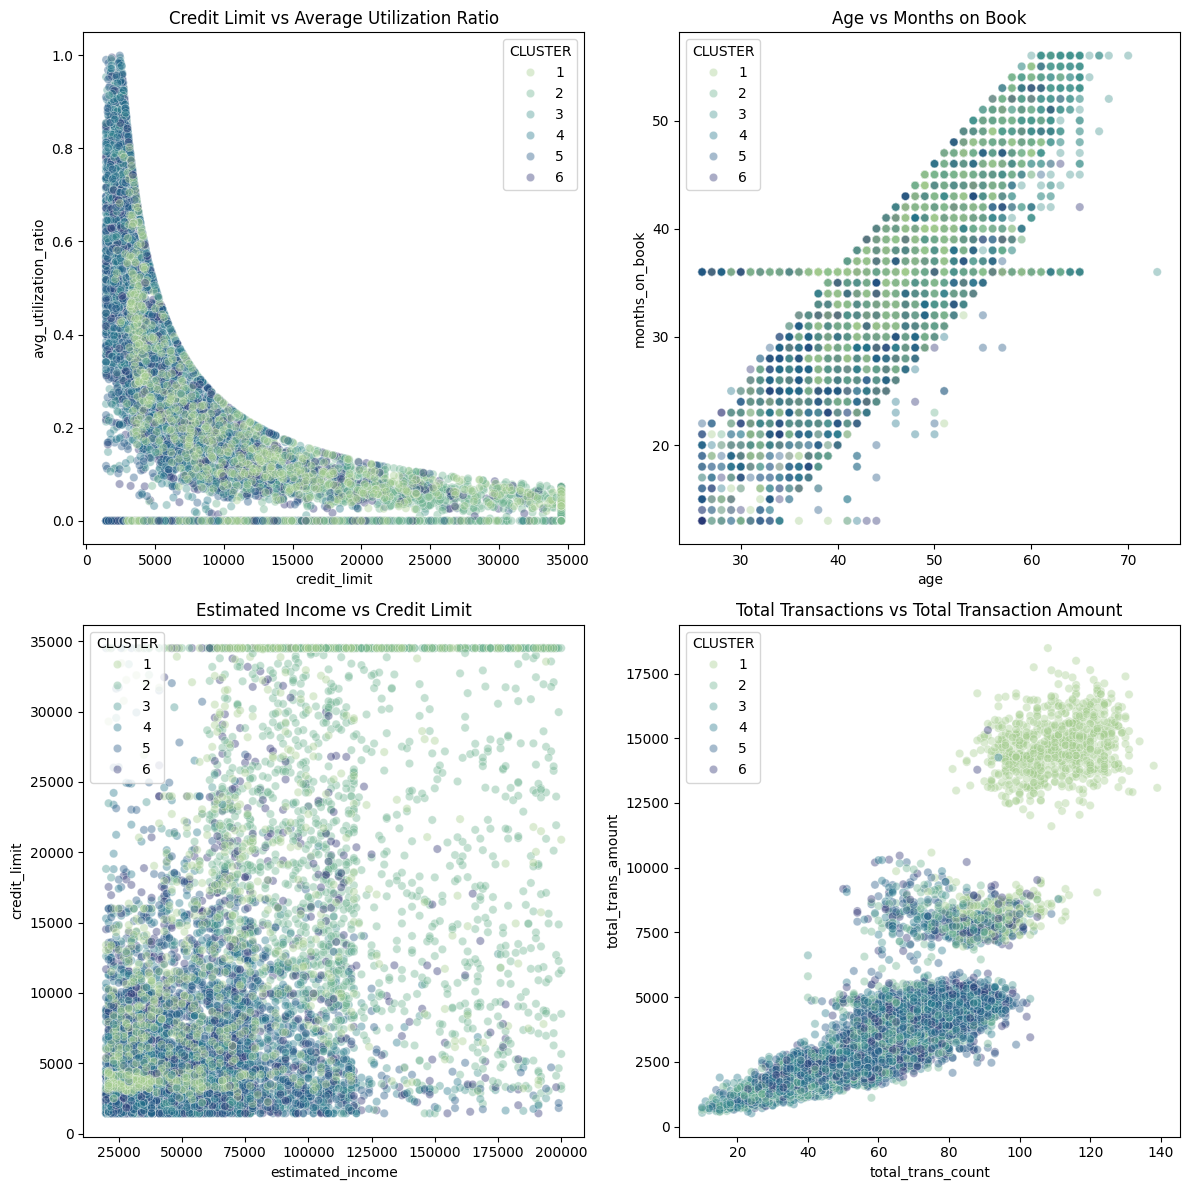

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', data=customer_data, hue='CLUSTER', ax=ax1, alpha=0.4, palette='crest')
sns.scatterplot(x='age', y='months_on_book', data=customer_data, hue='CLUSTER', ax=ax2,alpha=0.4,palette='crest')
sns.scatterplot(x='estimated_income', y='credit_limit', data=customer_data, hue='CLUSTER', ax=ax3, alpha=0.4,palette='crest')
sns.scatterplot(x='total_trans_count', y='total_trans_amount', data=customer_data, hue='CLUSTER', ax=ax4, alpha=0.4,palette='crest')

ax1.set_title('Credit Limit vs Average Utilization Ratio')
ax2.set_title('Age vs Months on Book')
ax3.set_title('Estimated Income vs Credit Limit')
ax4.set_title('Total Transactions vs Total Transaction Amount')

plt.tight_layout()
plt.show()

We can make some more conclusions with these scatter plots such as: cluster 1 and cluster 2 have the estimated income to credit limit ratio meaning they care customers who can spend or atleast the potential to spend the most, all clusters except 1 and 2 have high utilization ratios. The months of book for all clusters is pretty uniformely distributed.

Now we will graph a stacked bar graph to see stats about categorical columns.

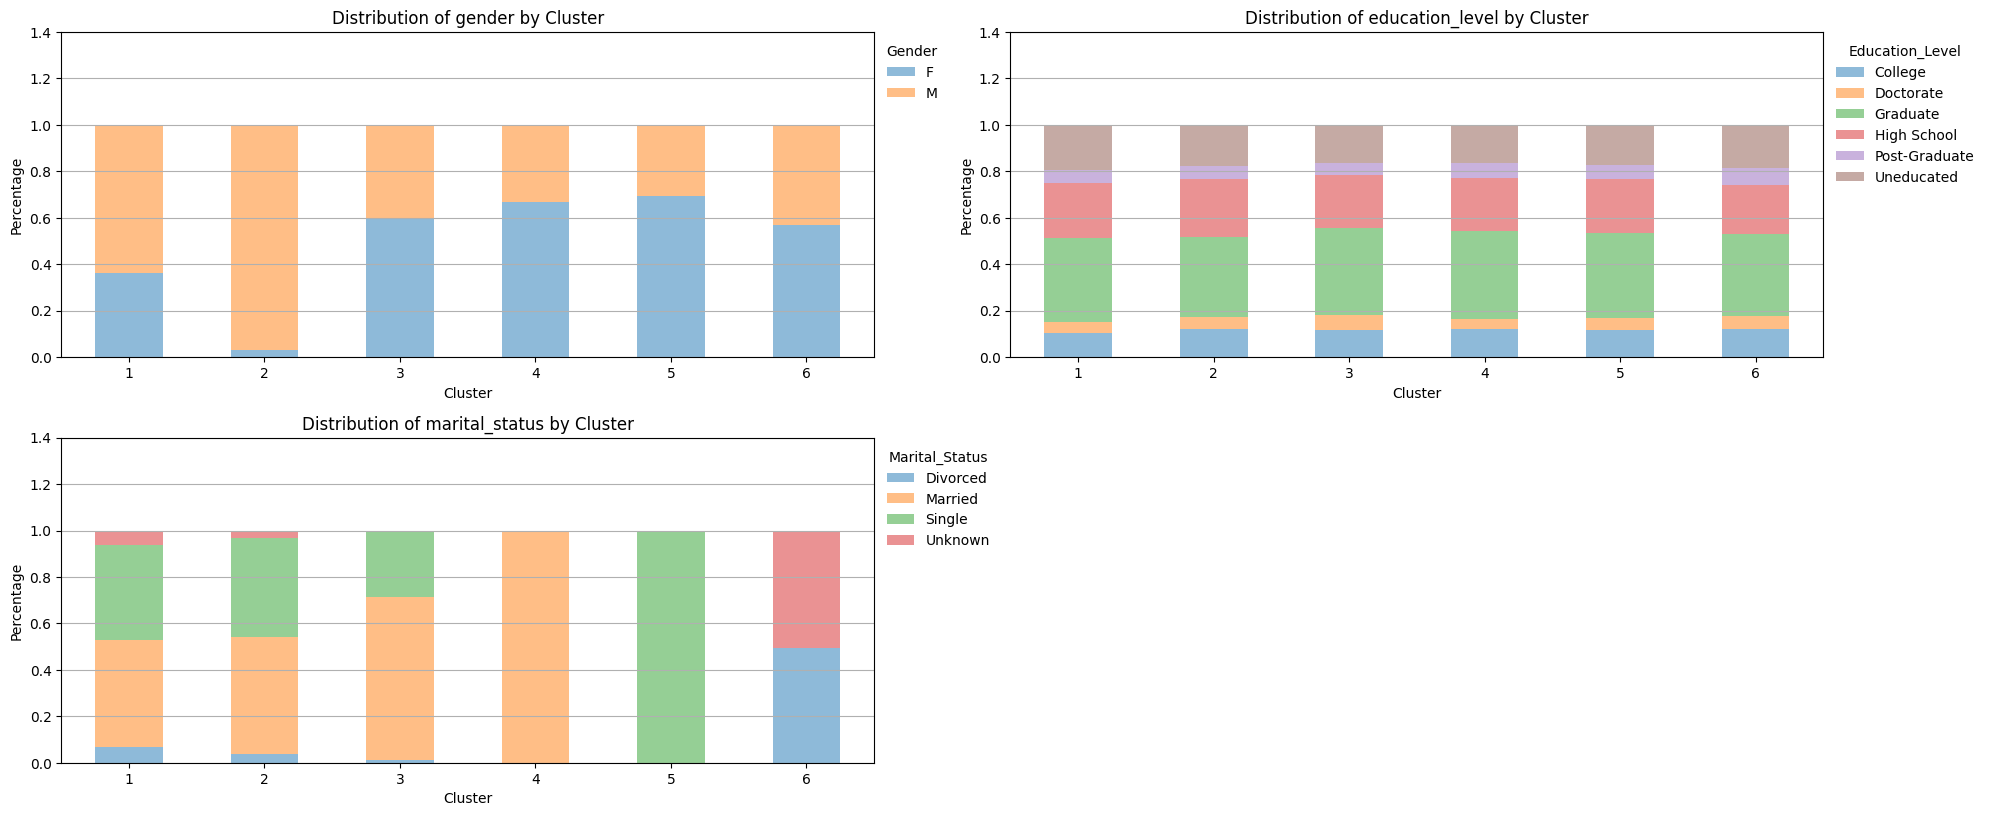

In [ ]:
cat_columns = customer_data.select_dtypes(include=['object'])

fig = plt.figure(figsize=(20,20))
for i, col in enumerate(cat_columns):
    df_plot = pd.crosstab(customer_data['CLUSTER'], customer_data[col], normalize='index')
    df_plot.plot(kind='bar', stacked=True, ax=fig.add_subplot(5, 2, i+1), alpha=0.5)
    plt.title(f'Distribution of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.xticks(rotation=0)
    plt.ylabel('Percentage')
    plt.ylim(0,1.4)
    plt.legend(title=col.title(), loc='upper left', bbox_to_anchor=(1,1), frameon=False)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

All things being equal we can see that education level is uniformely divided between all clusters.

Cluster 5 is 100% single while cluster 4 is 100% married. Cluster 6 is has the highest divorce rate and unkown rate. Cluster 3 has 60% female population and 40% male population, while cluster 2 is almost fully male.

# Conclusion

As the company required we have sucessfully segmentated the clientale into 6 different clusters and based on thier features deduced some important characteristics:

**Cluster 1**: Highest transcation amount, trasncation count, mostly males, low utilization rate. More incentives to use their credit card would be good.

**Cluster 2**: Almost 100% males, well distributed marital and education ratios, high estimated income and credit limit, but low utilization rate. Same as cluster 1 more icentives to use their credit card.

**Cluster 3**: More female than male population, uniform distribution of education status, mostly married, oldest population, highest utilization ratio, lowest dependants.

**Cluster 4**: 100% all married, mostly women, well distributed education status, above average utilization ratio and above average dependant count.

**Cluster 5**: 100 % all single population, mostly female, above average utilization ratio, and above average dependancy count. Uniformely distributed edcuation status.

**Cluster 6**: Either divorced or unkown, equal gender ratio, well distributed education status, Below average utilization rate, below average income levels, but around average in every other feature.

Below is the list of customer_id and cluster label.

In [ ]:
customer_data[['customer_id','CLUSTER']]

,customer_id,CLUSTER
0,768805383,4
1,818770008,5
2,713982108,4
3,769911858,6
4,709106358,4
...,...,...
10122,772366833,1
10123,710638233,6
10124,716506083,4
10125,717406983,6
